In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
df=pd.read_csv('quikr_car.csv')
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [38]:
df.shape

(892, 6)

In [40]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [42]:
df.info

<bound method DataFrame.info of                                        name    company  year          Price  \
0      Hyundai Santro Xing XO eRLX Euro III    Hyundai  2007         80,000   
1                   Mahindra Jeep CL550 MDI   Mahindra  2006       4,25,000   
2                Maruti Suzuki Alto 800 Vxi     Maruti  2018  Ask For Price   
3    Hyundai Grand i10 Magna 1.2 Kappa VTVT    Hyundai  2014       3,25,000   
4          Ford EcoSport Titanium 1.5L TDCi       Ford  2014       5,75,000   
..                                      ...        ...   ...            ...   
887                                      Ta       Tara  zest       3,10,000   
888                     Tata Zest XM Diesel       Tata  2018       2,60,000   
889                      Mahindra Quanto C8   Mahindra  2013       3,90,000   
890                Honda Amaze 1.2 E i VTEC      Honda  2014       1,80,000   
891               Chevrolet Sail 1.2 LT ABS  Chevrolet  2014       1,60,000   

     kms_driven fue

In [44]:
df.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


### Observations:

### 2.Data Cleaning:

In [67]:
# 1. Clean Price column
# First convert everything to string to ensure .str accessor works
df['Price'] = df['Price'].astype(str)
# Replace 'Ask For Price' with NaN
df['Price'] = df['Price'].replace('Ask For Price', np.nan)
# Remove commas and currency symbols using raw string
df['Price'] = df['Price'].str.replace(r'[^\d.]', '', regex=True)
# Convert to numeric (float)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# 2. Clean kms_driven column
# First convert to string
df['kms_driven'] = df['kms_driven'].astype(str)
# Extract numeric part using raw string (handles cases like "40 kms" or "45,000 kms")
df['kms_driven'] = df['kms_driven'].str.extract(r'(\d+[,\.]?\d*)')[0]
# Remove commas
df['kms_driven'] = df['kms_driven'].str.replace(',', '')
# Convert to numeric
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')

# 3. Handle year column
# Convert year to string first if it's not already
df['year'] = df['year'].astype(str)
# Extract 4-digit years from name if year is missing
df['year'] = df['year'].fillna(df['name'].str.extract(r'(\d{4})')[0])
# Convert to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# 4. Clean fuel_type
df['fuel_type'] = df['fuel_type'].astype(str).str.strip().str.title()
# Standardize fuel types
fuel_mapping = {
    'Petrol': 'Petrol',
    'Diesel': 'Diesel',
    'Cng': 'CNG',
    'Lpg': 'LPG',
    'Nan': 'Unknown',
    'None': 'Unknown'
}
df['fuel_type'] = df['fuel_type'].replace(fuel_mapping)
df['fuel_type'] = df['fuel_type'].fillna('Unknown')

# 5. Drop rows with missing essential values
df = df.dropna(subset=['Price', 'kms_driven', 'year'])

# 6. Create age column
current_year = pd.Timestamp.now().year
df['age'] = current_year - df['year']

# Verify the cleaned data
print("First 5 rows after cleaning:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isna().sum())

First 5 rows after cleaning:
                                     name   company    year     Price  \
0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007.0   80000.0   
1                 Mahindra Jeep CL550 MDI  Mahindra  2006.0  425000.0   
3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014.0  325000.0   
4        Ford EcoSport Titanium 1.5L TDCi      Ford  2014.0  575000.0   
6                               Ford Figo      Ford  2012.0  175000.0   

   kms_driven fuel_type   age  
0     45000.0    Petrol  18.0  
1        40.0    Diesel  19.0  
3     28000.0    Petrol  11.0  
4     36000.0    Diesel  11.0  
6     41000.0    Diesel  13.0  

Data types:
name           object
company        object
year          float64
Price         float64
kms_driven    float64
fuel_type      object
age           float64
dtype: object

Missing values:
name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
age           0
dtype: int64


### 3.Univariante analysis:

In [72]:
### Price Distribution:

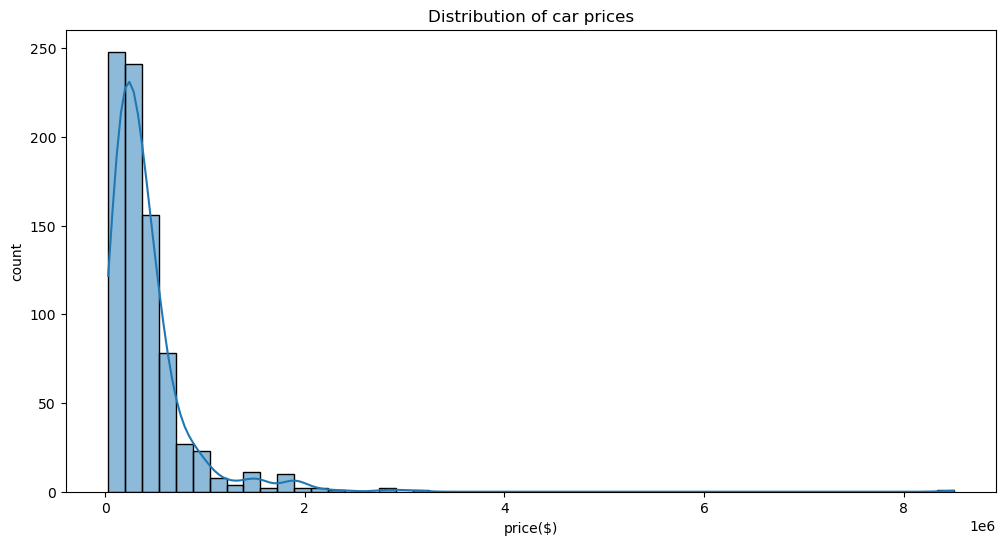

Price statistics:
count    8.170000e+02
mean     4.115503e+05
std      4.749173e+05
min      3.000000e+04
25%      1.750000e+05
50%      2.999990e+05
75%      4.900000e+05
max      8.500003e+06
Name: Price, dtype: float64


In [74]:
plt.figure(figsize=(12,6))
sns.histplot(df['Price'],bins=50,kde=True)
plt.title('Distribution of car prices')
plt.xlabel('price($)')
plt.ylabel('count')
plt.show()
print('Price statistics:')
print(df['Price'].describe())

In [76]:
### Kilometers Driven Distribution

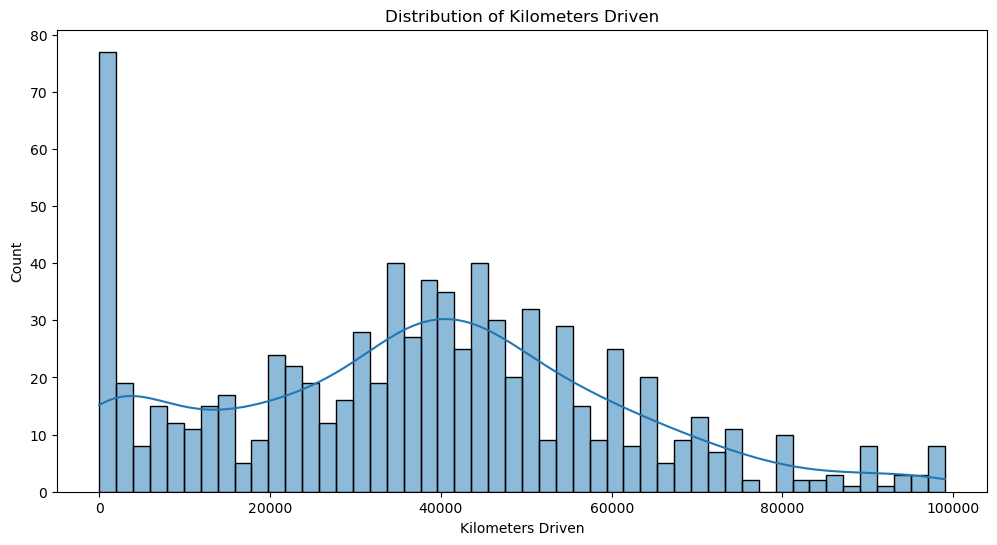

Kilometers driven statistics:
count      817.000000
mean     37430.392901
std      23302.215886
min          0.000000
25%      20000.000000
50%      38000.000000
75%      51000.000000
max      99000.000000
Name: kms_driven, dtype: float64


In [80]:
plt.figure(figsize=(12, 6))
sns.histplot(df['kms_driven'], bins=50, kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Count')
plt.show()

print("Kilometers driven statistics:")
print(df['kms_driven'].describe())

In [82]:
### Year/Age Distribution:

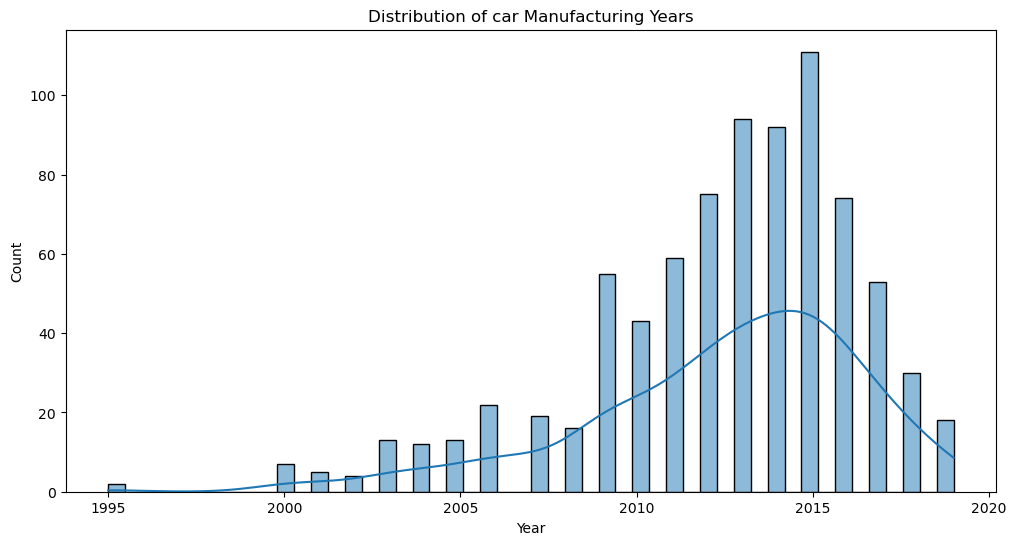

In [86]:
plt.figure(figsize=(12,6))
sns.histplot(df['year'],bins=50,kde=True)
plt.title("Distribution of car Manufacturing Years")
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [90]:
### Age Distribution:

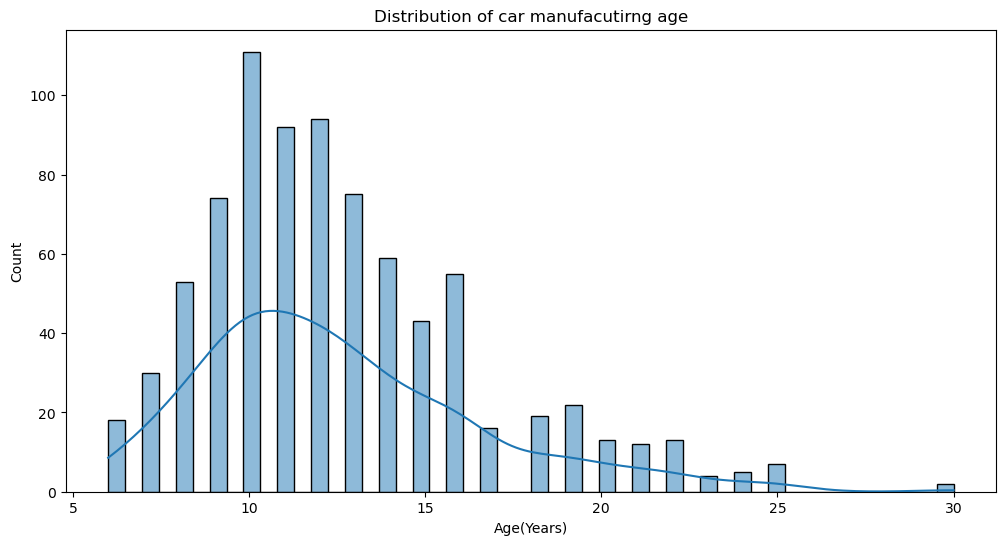

In [94]:
plt.figure(figsize=(12,6))
sns.histplot(df['age'],bins=50,kde=True)
plt.title("Distribution of car manufacutirng age")
plt.xlabel('Age(Years)')
plt.ylabel('Count')
plt.show()

In [96]:
### Fuel Distribution

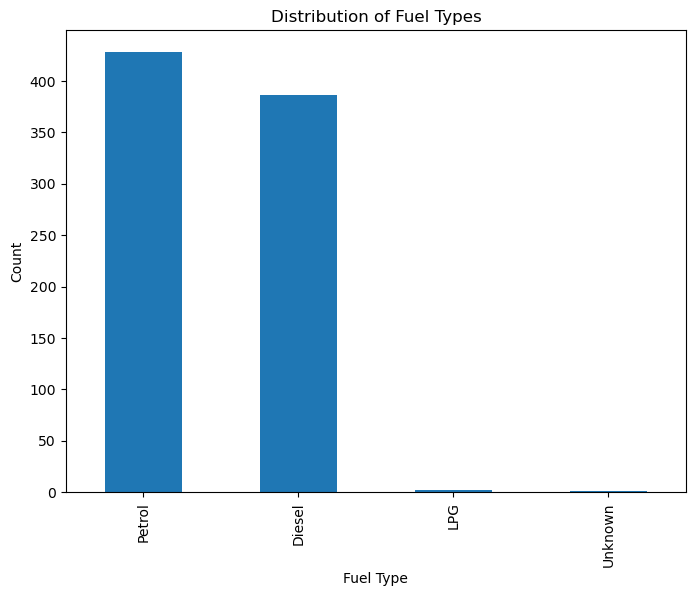

In [104]:
plt.figure(figsize=(8,6))
df['fuel_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [106]:
### Company Distribution:

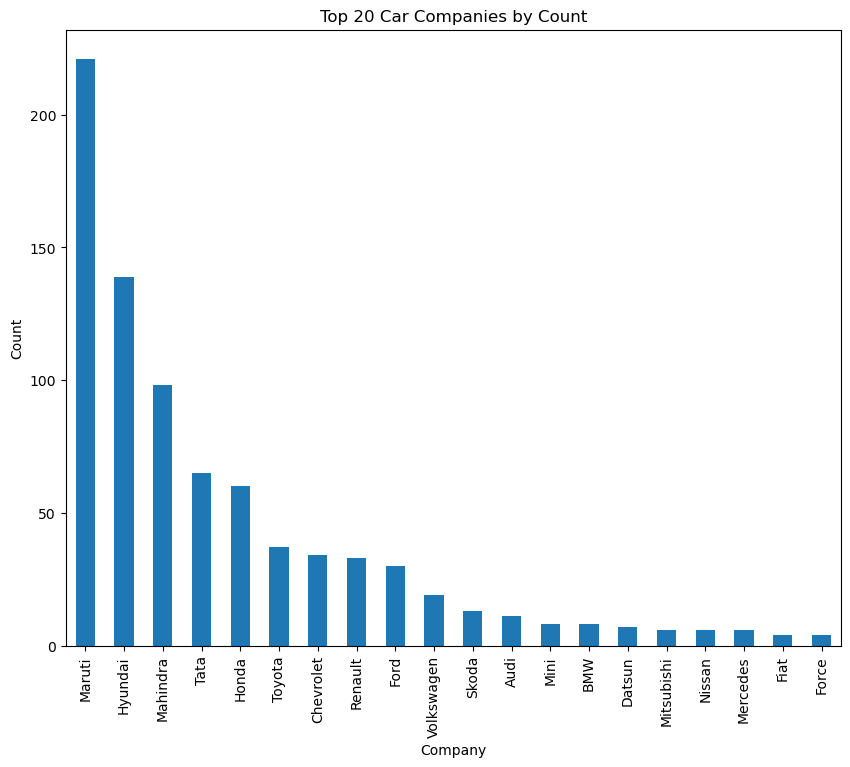

In [114]:
plt.figure(figsize=(10, 8))
df['company'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Car Companies by Count')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()


### 4.Bivariate Analysis:

### Price vs. Age

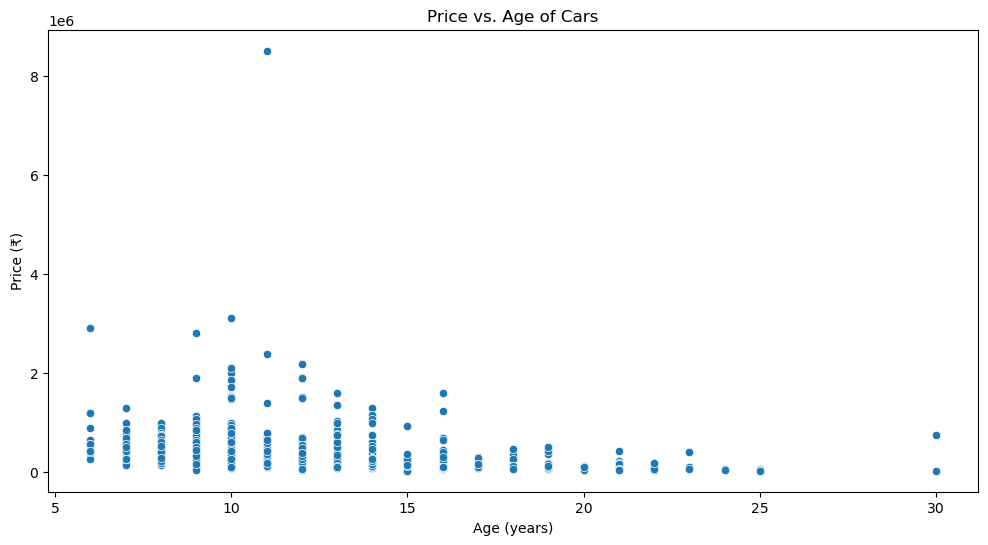

In [118]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='Price', data=df)
plt.title('Price vs. Age of Cars')
plt.xlabel('Age (years)')
plt.ylabel('Price (₹)')
plt.show()

### Price vs. Kilometers Driven

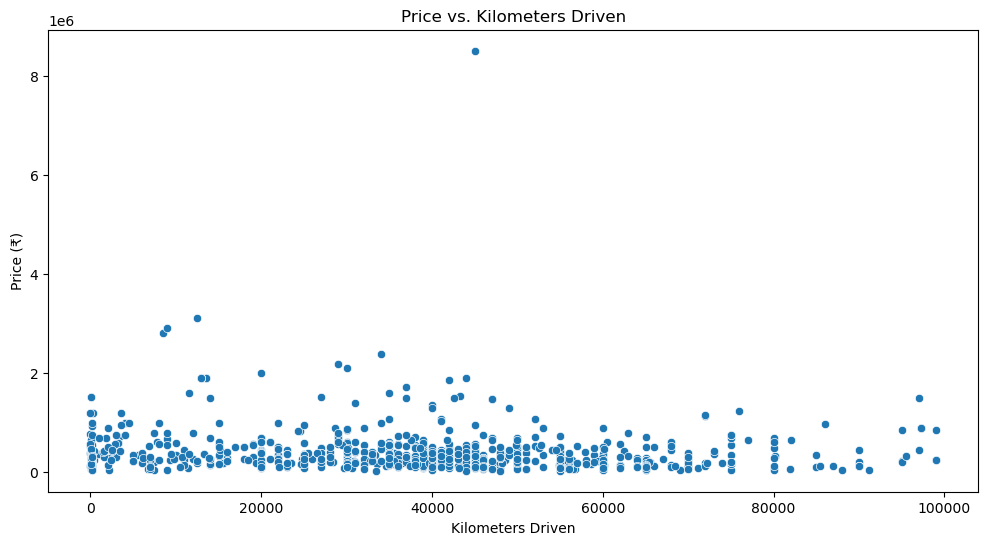

In [121]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='kms_driven', y='Price', data=df)
plt.title('Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (₹)')
plt.show()

### Price by Fuel Type

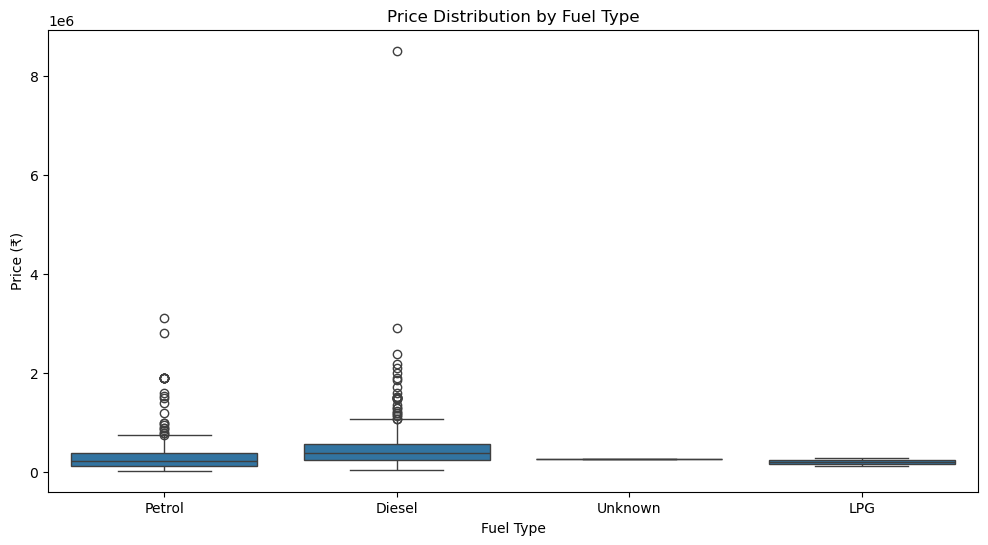

In [126]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='fuel_type', y='Price', data=df)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (₹)')
plt.show()

### Average Price by Company

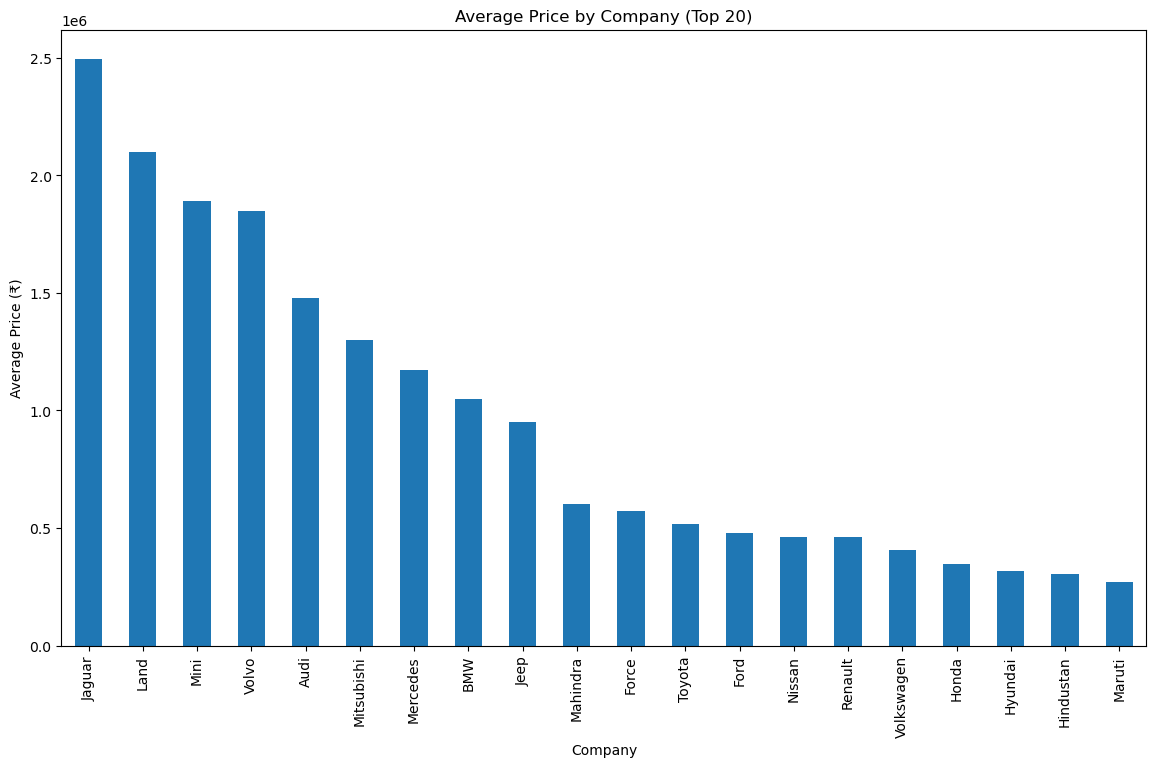

In [131]:
plt.figure(figsize=(14, 8))
df.groupby('company')['Price'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Average Price by Company (Top 20)')
plt.xlabel('Company')
plt.ylabel('Average Price (₹)')
plt.show()

### 5. Multivariate Analysis
### Price, Age, and Kilometers Driven


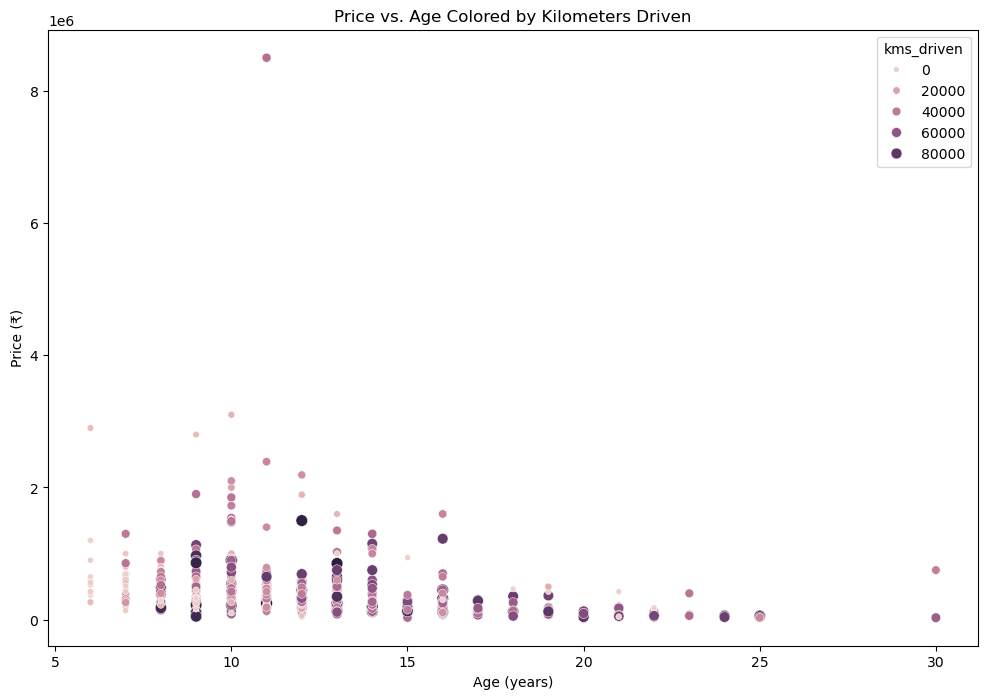

In [134]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='Price', hue='kms_driven', size='kms_driven', data=df)
plt.title('Price vs. Age Colored by Kilometers Driven')
plt.xlabel('Age (years)')
plt.ylabel('Price (₹)')
plt.show()

### Correlation Matrix

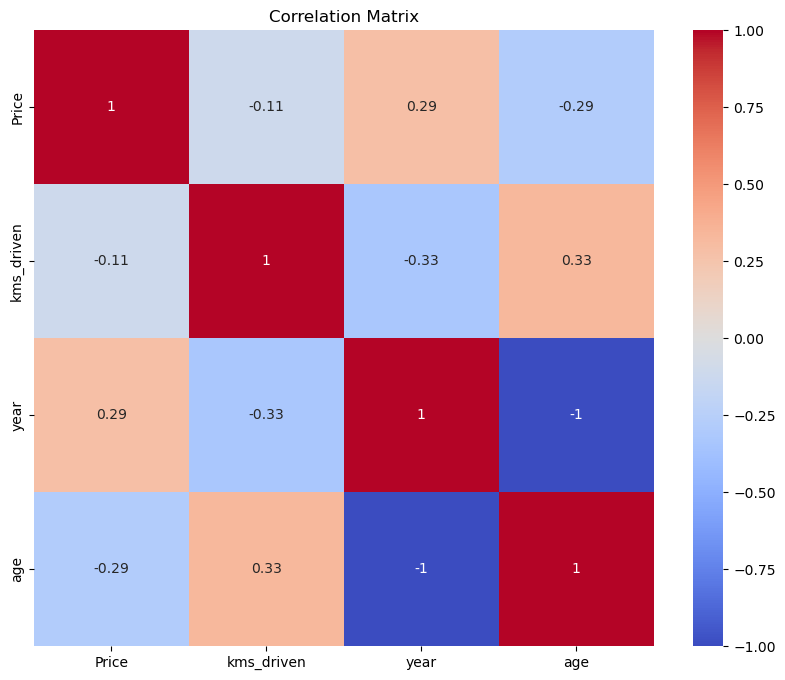

In [137]:
numeric_df = df[['Price', 'kms_driven', 'year', 'age']]
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 6. Outlier Detection

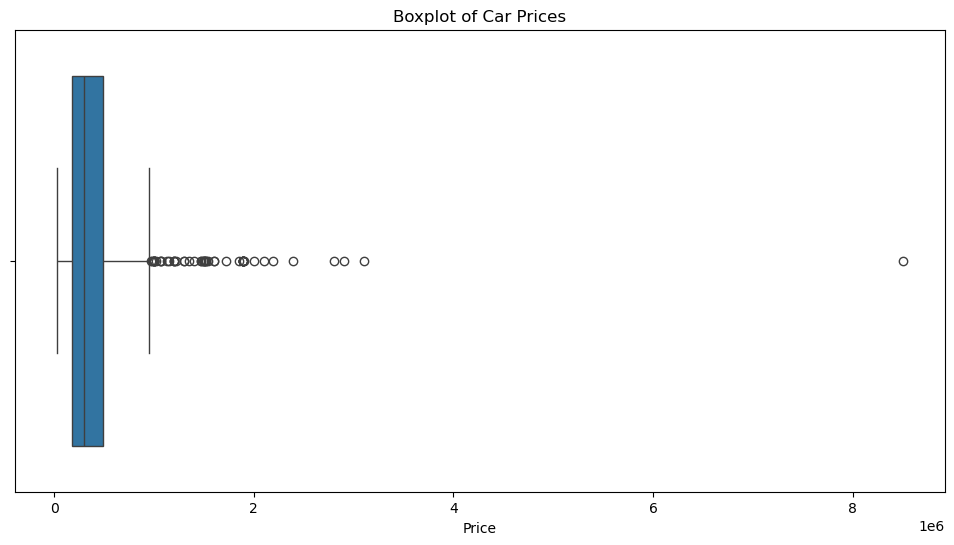

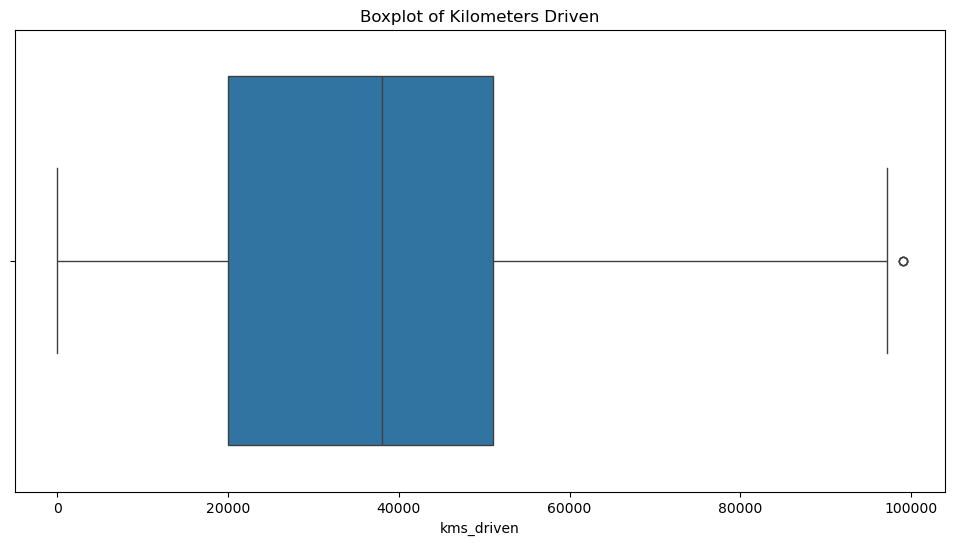

In [140]:
# Boxplot for price
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Car Prices')
plt.show()

# Boxplot for kilometers driven
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['kms_driven'])
plt.title('Boxplot of Kilometers Driven')
plt.show()

### 7. Time Series Analysis
### Average Price by Year

In [ ]:
plt.figure(figsize=(14, 7))
df.groupby('year')['Price'].mean().plot()
plt.title('Average Price by Manufacturing Year')
plt.xlabel('Year')
plt.ylabel('Average Price (₹)')
plt.show()

In [ ]:
plt.figure(figsize=(14,7))
df.groupby('year')['Price'].mean().plot()
plt.title('Average Price by Man